# Data Cleaning & Preparation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [ ]:
covid_df = pd.read_csv('../data/covidcast-1.csv')

print("Shape:", covid_df.shape)
print("\nColumns:\n", covid_df.columns.tolist())
covid_df.head()

Shape: (25626, 19)

Columns:
 ['time_value', 'geo_value', 'smoothed_wspent_time_1d', 'smoothed_wtested_14d', 'smoothed_wpublic_transit_1d', 'smoothed_wworried_become_ill', 'smoothed_wvaccine_likely_govt_health', 'smoothed_wshop_1d', 'smoothed_wtested_positive_14d', 'smoothed_wwork_outside_home_1d', 'smoothed_wothers_masked', 'smoothed_wcli', 'smoothed_wcovid_vaccinated', 'smoothed_wvaccine_likely_friends', 'smoothed_wrestaurant_1d', 'smoothed_wvaccine_likely_politicians', 'smoothed_wvaccine_likely_who', 'smoothed_wwearing_mask', 'smoothed_wlarge_event_1d']


,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,1/7/2021,1000,34.412959,12.541558,1.464798,65.771681,22.086274,52.854667,29.288429,30.487852,57.334785,3.244379,2.6382,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098
1,1/7/2021,1003,32.814153,10.189340,1.270183,61.516584,25.179399,51.160278,NaN,28.384842,53.172285,1.199572,NaN,27.532881,23.406516,8.933682,28.864558,82.778220,11.727249
2,1/7/2021,1015,35.621311,14.591271,6.594649,NaN,NaN,54.503711,NaN,37.003522,NaN,3.890709,NaN,NaN,20.974363,NaN,NaN,NaN,13.255336
3,1/7/2021,1051,40.453615,14.164503,3.320922,68.718538,19.438763,54.948755,NaN,37.637900,67.550815,3.284647,NaN,30.223647,20.009477,7.570250,26.494057,86.587182,13.823318
4,1/7/2021,1069,39.228766,10.103564,0.288897,59.961036,23.065494,60.118290,NaN,36.156326,55.995745,1.881970,NaN,30.806929,16.574756,12.916249,24.747620,85.825453,10.258936


In [ ]:
# Check for values outside 0-100
invalid_vals = (covid_df.drop(columns=['time_value', 'geo_value']) < 0) | (covid_df.drop(columns=['time_value', 'geo_value']) > 100)
invalid_counts = invalid_vals.sum().sort_values(ascending=False)
print("Invalid value counts per column:\n", invalid_counts[invalid_counts > 0])

Invalid value counts per column:
 Series([], dtype: int64)


In [ ]:
# Summary statistics
covid_df.describe()

,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
count,25626.000000,25066.000000,24688.000000,25066.000000,22515.000000,21257.000000,25066.000000,3994.000000,25066.000000,22097.000000,25481.000000,23024.000000,21366.000000,25066.000000,21123.000000,21270.000000,21985.000000,25066.000000
mean,30022.116717,31.899631,13.120482,2.891016,68.690158,31.117297,53.524201,17.250770,33.999334,81.330137,1.055272,13.674725,34.275744,15.422098,10.100442,36.036825,91.912426,8.514499
std,15464.317094,6.038189,4.640677,2.661727,5.684796,6.641353,5.625381,7.419522,6.310551,12.676522,0.694818,6.665828,5.137006,6.014144,3.353021,7.192531,5.103774,4.269184
min,1000.000000,11.685945,2.144153,0.095057,40.062171,11.408837,32.682451,1.548609,11.041209,22.668564,0.000000,0.891041,15.283547,0.367614,1.256728,13.241941,58.270015,0.274725
25%,17113.000000,27.811878,9.890346,1.565133,65.117334,26.385056,49.588164,11.616797,29.658307,75.032420,0.560933,8.333788,30.858041,10.896965,7.709210,30.833044,89.285249,5.254783
50%,33005.000000,31.685359,12.451805,2.384280,69.024887,30.788040,53.015007,16.530456,33.731881,85.196143,0.942783,12.773208,34.188723,15.375892,9.852045,35.865667,93.220612,7.993092
75%,42077.000000,35.744053,15.601016,3.461986,72.587625,35.415755,57.217082,22.153012,38.154894,90.995163,1.436505,18.000759,37.691155,19.462221,12.118213,41.051398,95.717480,11.135571
max,56025.000000,58.805310,40.974146,36.015469,93.900646,56.214259,83.593709,46.644291,59.786678,99.373646,5.123363,45.466215,63.411506,51.142119,28.285788,62.468991,99.732673,33.337252


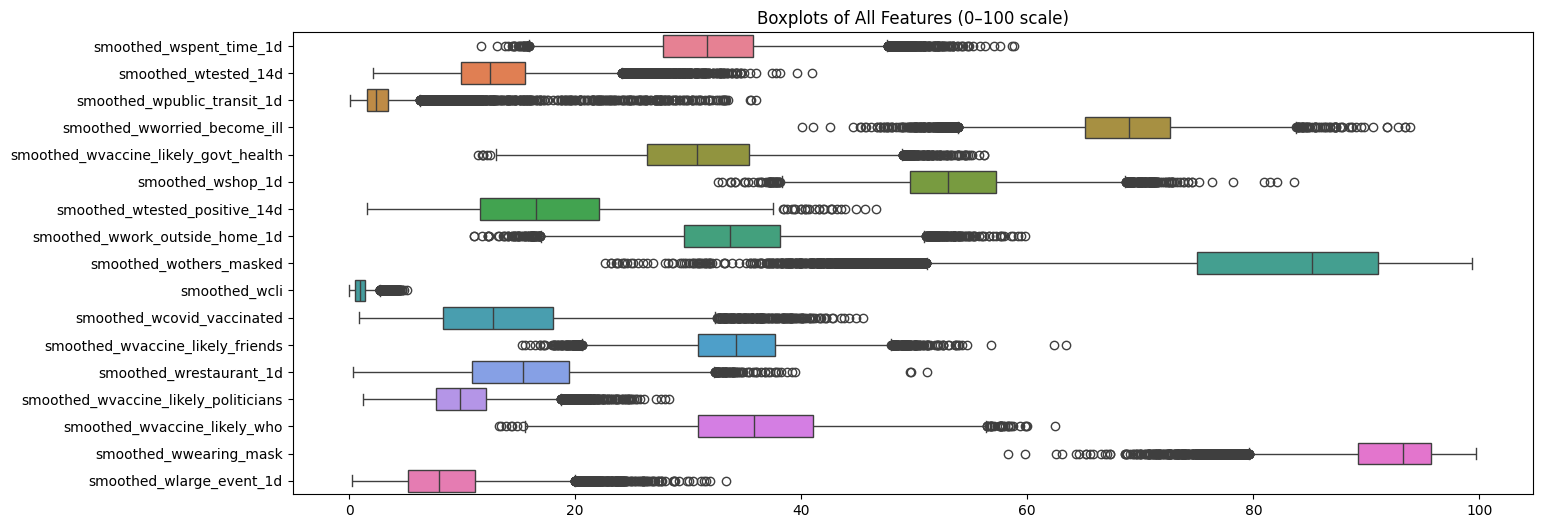

In [ ]:
# Visualize outliers with boxplots
plt.figure(figsize=(16, 6))
sns.boxplot(data=covid_df.drop(columns=['time_value', 'geo_value']), orient='h')
plt.title("Boxplots of All Features (0–100 scale)")
plt.show()

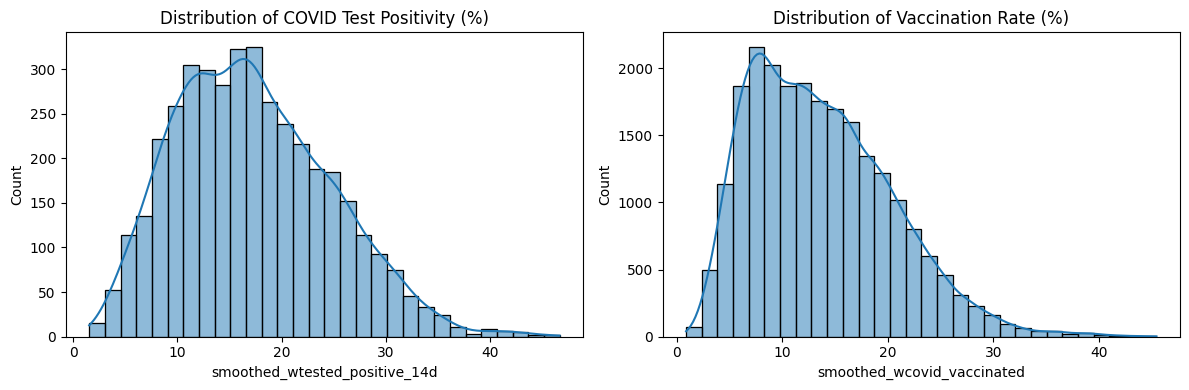

In [ ]:
# Histogram of target variables
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(covid_df['smoothed_wtested_positive_14d'], kde=True, bins=30)
plt.title("Distribution of COVID Test Positivity (%)")

plt.subplot(1, 2, 2)
sns.histplot(covid_df['smoothed_wcovid_vaccinated'], kde=True, bins=30)
plt.title("Distribution of Vaccination Rate (%)")

plt.tight_layout()
plt.show()

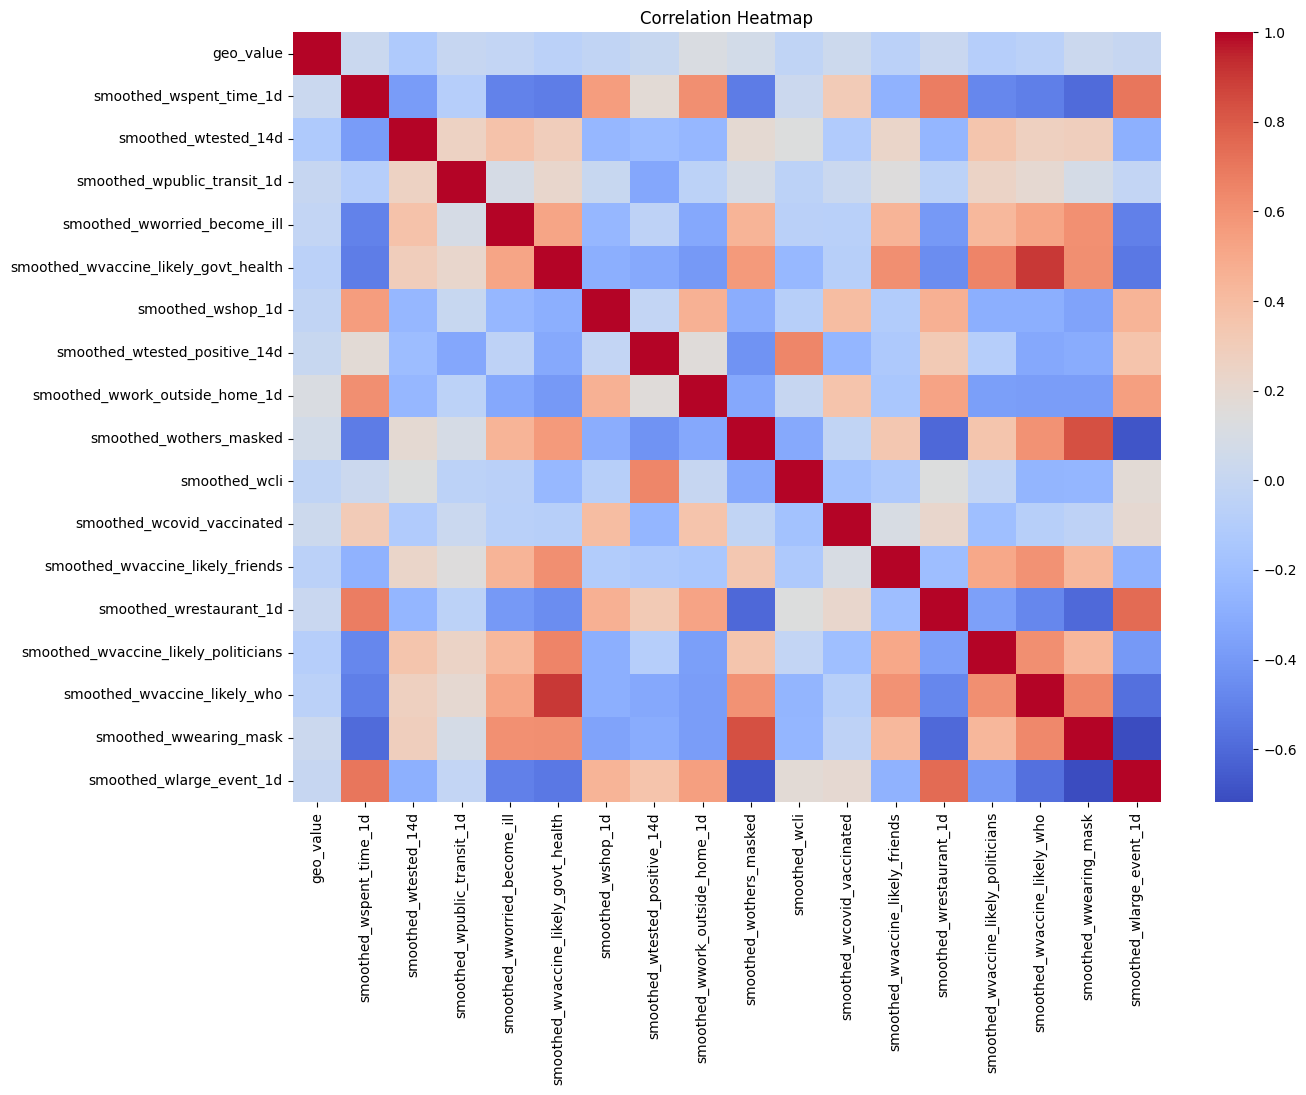

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(covid_df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

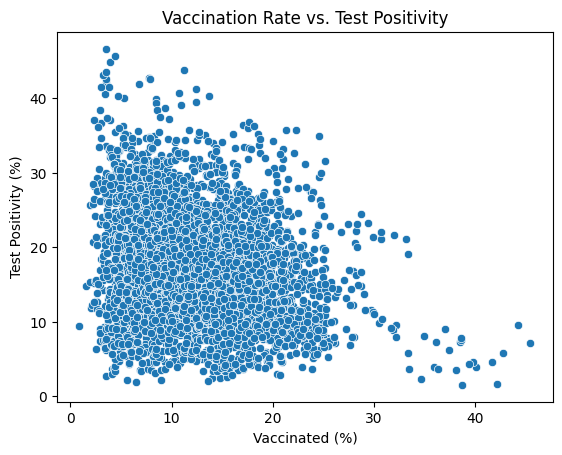

In [ ]:
# Scatterplot : Vaccination vs Test Positivity
sns.scatterplot(
    data=covid_df,
    x='smoothed_wcovid_vaccinated',
    y='smoothed_wtested_positive_14d'
)
plt.title("Vaccination Rate vs. Test Positivity")
plt.xlabel("Vaccinated (%)")
plt.ylabel("Test Positivity (%)")
plt.show()


## Split Datasets + Handle Missing Values

In [ ]:
# Drop rows with missing target
df_cases = covid_df.dropna(subset=['smoothed_wtested_positive_14d']).copy()
df_vaccine = covid_df.dropna(subset=['smoothed_wcovid_vaccinated']).copy()

# Identify feature columns (exclude both targets + metadata)
feature_cols = [col for col in covid_df.columns if col not in ['time_value', 'geo_value', 'smoothed_wtested_positive_14d', 'smoothed_wcovid_vaccinated']]

# Impute missing features using mean
imputer = SimpleImputer(strategy='mean')

df_cases[feature_cols] = imputer.fit_transform(df_cases[feature_cols])
df_vaccine[feature_cols] = imputer.fit_transform(df_vaccine[feature_cols])

print("Cleaned Cases dataset shape:", df_cases.shape)
print("Cleaned Vaccine dataset shape:", df_vaccine.shape)

print("\nRemaining nulls in cases:", df_cases[feature_cols].isnull().sum().sum())
print("Remaining nulls in vaccine:", df_vaccine[feature_cols].isnull().sum().sum())


Cleaned Cases dataset shape: (3994, 19)
Cleaned Vaccine dataset shape: (23024, 19)

Remaining nulls in cases: 0
Remaining nulls in vaccine: 0


## Feature Selection

### For Vaccines dataset

Feature correlations with vaccination rate:

smoothed_wshop_1d                       0.396846
smoothed_wwork_outside_home_1d          0.359015
smoothed_wspent_time_1d                 0.308041
smoothed_wrestaurant_1d                 0.215985
smoothed_wlarge_event_1d                0.199850
smoothed_wvaccine_likely_friends        0.090401
geo_value                               0.038766
smoothed_wpublic_transit_1d             0.020133
smoothed_wothers_masked                -0.024365
smoothed_wwearing_mask                 -0.041569
smoothed_wvaccine_likely_govt_health   -0.067263
smoothed_wworried_become_ill           -0.069301
smoothed_wvaccine_likely_who           -0.069318
smoothed_wtested_14d                   -0.108362
smoothed_wvaccine_likely_politicians   -0.176382
smoothed_wcli                          -0.180659
smoothed_wtested_positive_14d          -0.249306
Name: smoothed_wcovid_vaccinated, dtype: float64


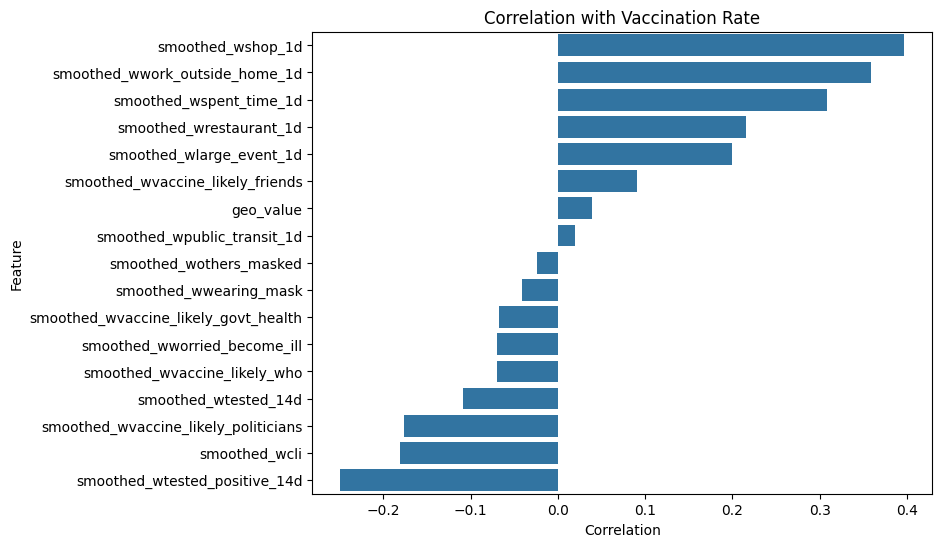

In [ ]:
# Compute correlations with the vaccine target
corrs_vaccine = df_vaccine.corr(numeric_only=True)['smoothed_wcovid_vaccinated'].drop('smoothed_wcovid_vaccinated')
corrs_vaccine = corrs_vaccine.sort_values(ascending=False)

print("Feature correlations with vaccination rate:\n")
print(corrs_vaccine)

plt.figure(figsize=(8, 6))
sns.barplot(y=corrs_vaccine.index, x=corrs_vaccine.values)
plt.title("Correlation with Vaccination Rate")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

In [ ]:
selected_vaccine_features = [
    'smoothed_wshop_1d',
    'smoothed_wwork_outside_home_1d',
    'smoothed_wspent_time_1d',
    'smoothed_wrestaurant_1d',
    'smoothed_wlarge_event_1d',
    'smoothed_wvaccine_likely_friends'
]


### For Test Positivity dataset

Feature correlations with test positivity:

smoothed_wcli                           0.638724
smoothed_wlarge_event_1d                0.356886
smoothed_wrestaurant_1d                 0.312703
smoothed_wspent_time_1d                 0.177104
smoothed_wwork_outside_home_1d          0.154467
geo_value                               0.006591
smoothed_wshop_1d                      -0.019255
smoothed_wworried_become_ill           -0.044075
smoothed_wvaccine_likely_politicians   -0.082015
smoothed_wvaccine_likely_friends       -0.120619
smoothed_wtested_14d                   -0.210425
smoothed_wcovid_vaccinated             -0.249306
smoothed_wwearing_mask                 -0.304809
smoothed_wvaccine_likely_govt_health   -0.313716
smoothed_wvaccine_likely_who           -0.325773
smoothed_wpublic_transit_1d            -0.326271
smoothed_wothers_masked                -0.423950
Name: smoothed_wtested_positive_14d, dtype: float64


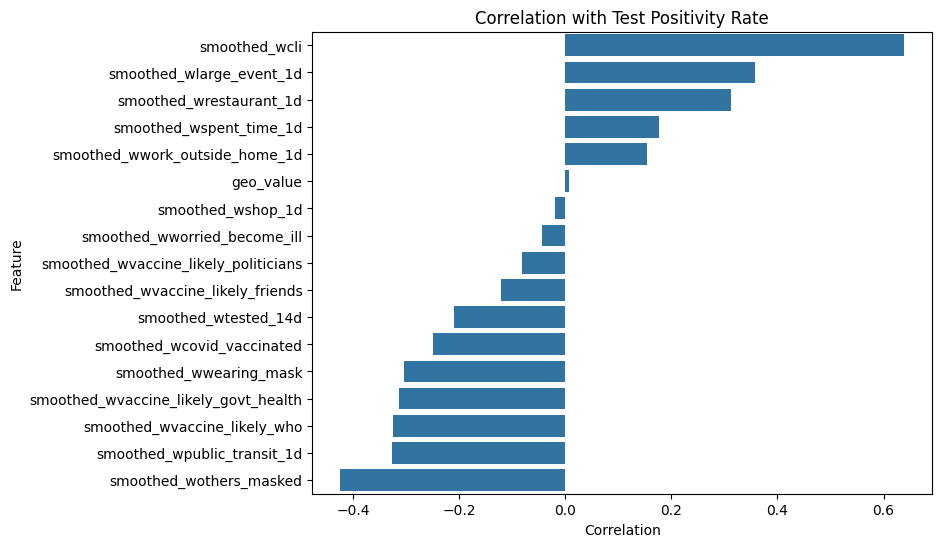

In [ ]:
# Compute correlations with test positivity target
corrs_cases = df_cases.corr(numeric_only=True)['smoothed_wtested_positive_14d'].drop('smoothed_wtested_positive_14d')
corrs_cases = corrs_cases.sort_values(ascending=False)

print("Feature correlations with test positivity:\n")
print(corrs_cases)

plt.figure(figsize=(8, 6))
sns.barplot(y=corrs_cases.index, x=corrs_cases.values)
plt.title("Correlation with Test Positivity Rate")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

In [ ]:
selected_cases_features = [
    'smoothed_wcli',
    'smoothed_wlarge_event_1d',
    'smoothed_wrestaurant_1d',
    'smoothed_wspent_time_1d',
    'smoothed_wwork_outside_home_1d',
    'smoothed_wothers_masked',
    'smoothed_wcovid_vaccinated'
]

### Saving preprocessed datasets

In [ ]:
import os

os.makedirs('../data', exist_ok=True)

# Vaccine uptake dataset
df_vaccine_final = df_vaccine[selected_vaccine_features + ['smoothed_wcovid_vaccinated']]
df_vaccine_final.to_csv('../data/cleaned_vaccine_dataset.csv', index=False)

# COVID test positivity dataset
df_cases_final = df_cases[selected_cases_features + ['smoothed_wtested_positive_14d']]
df_cases_final.to_csv('../data/cleaned_cases_dataset.csv', index=False)

print("Saved cleaned datasets")


Saved cleaned datasets
